In [2]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=DeprecationWarning)

import numpy as np
import pandas as pd
import seaborn as sns

In this notebook you will work with astronomical observation data used to classify celestial objects. (Some missing values are given as $-9999$, and those are removed here.)

In [3]:
astro = pd.read_csv("star_classification.csv")
astro.replace(-9999, np.nan, inplace=True)
astro.dropna(inplace=True)
astro.head()

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,GALAXY,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,GALAXY,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,GALAXY,0.644195,4576,55592,299
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,GALAXY,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,GALAXY,0.116123,6121,56187,842


## 1.
(3.1) Determine how many instances are in the frame for each different label in the *class* column.

In [ ]:
class_counts = None
class_counts = astro['class'].value_counts()

class
GALAXY    59445
STAR      21593
QSO       18961
Name: count, dtype: int64


In [6]:
print(class_counts)

class
GALAXY    59445
STAR      21593
QSO       18961
Name: count, dtype: int64


In [7]:
# TESTS
assert type(class_counts) == pd.Series, "result must be a series"
assert len(class_counts) == 3, "wrong length"
assert class_counts.sum() == len(astro["class"]), "wrong values"
print("OK")

OK


In [ ]:
# Intentionally left blank--do not delete

## 2.
(3.1) Let `X` be a subset frame with the columns named *u*, *g*, *r*, *i*, *z*. Let `y` be the column *class*.

In [10]:
X = None
y = None

features = ["u", "g", "r", "i", "z"]

X = astro[features]
y = astro["class"]


In [15]:
X.head(7)

,u,g,r,i,z
0,23.87882,22.27530,20.39501,19.16573,18.79371
1,24.77759,22.83188,22.58444,21.16812,21.61427
2,25.26307,22.66389,20.60976,19.34857,18.94827
3,22.13682,23.77656,21.61162,20.50454,19.25010
4,19.43718,17.58028,16.49747,15.97711,15.54461
5,23.48827,23.33776,21.32195,20.25615,19.54544
6,21.46973,21.17624,20.92829,20.60826,20.42573


In [12]:
y.head(7)

0    GALAXY
1    GALAXY
2    GALAXY
3    GALAXY
4    GALAXY
5       QSO
6       QSO
Name: class, dtype: object

In [16]:
# TESTS
assert type(X)==pd.DataFrame, "result must be a frame"
assert X.shape[1]==5, "result must have 5 columns"
print("OK")

OK


In [ ]:
# Intentionally left blank--do not delete

## 3.
(3.4) Each row of `X` is a 5-dimensional vector. Let `v` be the difference between the second row and the first row of `X`. Find the 1-norm and 2-norm of `v`.

In [17]:
one_norm, two_norm = None, None

v = x.iloc[1]-x.iloc[0] 

v_norm_1 = np.linalg.norm(v, ord=1)
v_norm_2 = np.linalg.norm(v, ord=2)

one_norm = v_norm_1
two_norm = v_norm_2


print(one_norm)
print(two_norm)

8.46773
4.228037010233


In [19]:
print(f"Vector has 2-norm {two_norm:.5f} and 1-norm {one_norm:.5f}.")

Vector has 2-norm 4.22804 and 1-norm 8.46773.


In [18]:
# TESTS
assert 4 < two_norm < 5, "wrong value"
assert 8 < one_norm < 9, "wrong value"
print("OK")

OK


## 4.
(3.2) Split the data into training set `X_train,y_train` with 80% of the data, and `X_test,y_test` for testing. 

**IMPORTANT**: Make sure the split order is randomized starting from random state 3383.

In [21]:
X_train, y_train, X_test, y_test = None,None,None,None

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=3383)

In [22]:
X_train.head()

,u,g,r,i,z
75246,22.41440,21.55760,20.49684,19.65604,19.20274
67673,24.40962,22.67290,21.06712,19.67476,19.13970
42686,23.00664,23.84709,21.80138,20.43518,19.78358
84920,26.65251,22.74168,21.02623,19.81380,19.29055
41494,20.44297,18.69604,17.53594,17.07274,16.71922


In [23]:
X_test.head()

,u,g,r,i,z
83377,23.42178,21.41524,20.14865,18.87432,18.21298
9869,22.26999,22.35811,21.58266,21.64061,22.07717
92816,21.89207,19.80794,19.44393,19.32646,19.24478
64068,22.40285,22.10943,22.04930,21.72133,21.52669
75158,25.13951,22.50673,20.70473,19.73078,19.31687


In [25]:
# TESTS
assert np.isclose( X_train["u"].sum(), 1766124 ), "wrong rows in training features"
assert (y_test=="GALAXY").sum() == 11999, "wrong rows in test labels"
print("OK")

OK


## 5.
(3.4) Train a kNN classifier with $k=11$ neighbors on the training set. Find its $F_1$ score on the test set using `"macro"` averaging.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score

knn = KNeighborsClassifier(n_neighbors=11)

knn.fit(X_train, y_train)

yhat = knn.predict(X_test)

knn_f1 = f1_score(y_test, yhat, average="macro")

print(knn_f1)


0.8301724266568452


In [28]:
print(f"F1 score for knn = {knn_f1:.6f}")

F1 score for knn = 0.830172


In [27]:
# TESTS
assert 0.77 < knn_f1 < 0.85, "wrong value"
print("OK")

OK


In [ ]:
# Intentionally left blank--do not delete

## 6.
(3.4) Display (as a plot) the confusion matrix on the test set for the classifier trained in step 5.

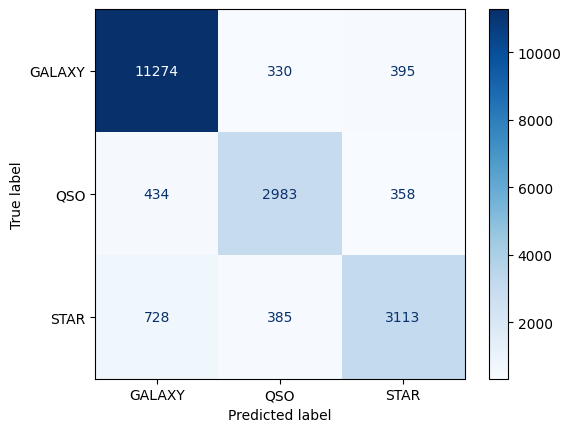

In [ ]:
import sklearn
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

C = confusion_matrix(y_test, yhat)

cm_display = ConfusionMatrixDisplay(confusion_matrix=C, display_labels=knn.classes_)

cm_display.plot(cmap='Blues', values_format='d')

import matplotlib.pyplot as plt
plt.show()


## 7. 
(3.4) Repeat step 5 with a pipeline that adds a standardization scaler before the kNN classifier. (There will not be much change, since the original columns have similar summary statistics.)

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score

pipe = Pipeline([
    ('scaler', StandardScaler()),  
    ('knn', KNeighborsClassifier(n_neighbors=11)) 
])

pipe.fit(X_train, y_train)

yhat = pipe.predict(X_test)

pipe_f1 = f1_score(y_test, yhat, average="macro")

print(pipe_f1)


0.8326145891487248


In [31]:
print(f"F1 score for pipeline = {pipe_f1:.6f}")

F1 score for pipeline = 0.832615


In [32]:
# TESTS
assert 0.8 < pipe_f1 < 0.85, "wrong value"
print("OK")

OK


In [ ]:
# Intentionally left blank--do not delete

## 8. 
(3.4) Retrain the pipeline from step 7 starting with a feature frame `X` that also includes the *redshift* column. Display the confusion matrix on the test set.

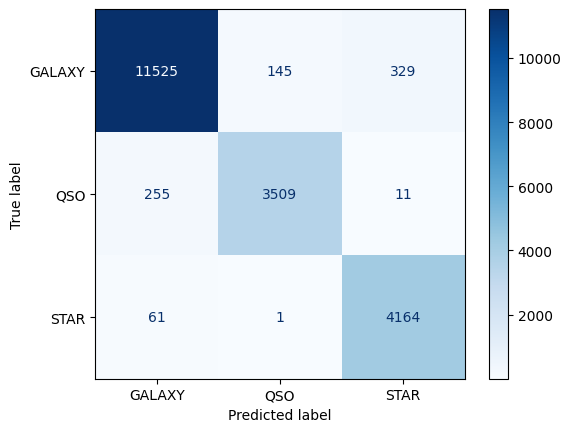

In [38]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

features_with_redshift = ["u", "g", "r", "i", "z", "redshift"]

X_with_redshift = astro[features_with_redshift]

y = astro["class"]

X_train, X_test, y_train, y_test = train_test_split(X_with_redshift, y, test_size=0.2, shuffle=True, random_state=3383)

pipe = Pipeline([
    ('scaler', StandardScaler()),  
    ('knn', KNeighborsClassifier(n_neighbors=11))  
])

pipe.fit(X_train, y_train)

yhat = pipe.predict(X_test)

C = confusion_matrix(y_test, yhat)

cm_display = ConfusionMatrixDisplay(confusion_matrix=C, display_labels=pipe.classes_)

cm_display.plot(cmap='Blues', values_format='d')

plt.show()


In [35]:
print(X_train.columns)


Index(['u', 'g', 'r', 'i', 'z'], dtype='object')


In [36]:
print(astro.columns)


Index(['obj_ID', 'alpha', 'delta', 'u', 'g', 'r', 'i', 'z', 'run_ID',
       'rerun_ID', 'cam_col', 'field_ID', 'spec_obj_ID', 'class', 'redshift',
       'plate', 'MJD', 'fiber_ID'],
      dtype='object')
